<a href="https://colab.research.google.com/github/moh2-lh/moh2-lh/blob/main/Copy_of_Copy_of_00_Image_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© 2021 Zaka AI, Inc. All Rights Reserved

#Image Operations

**Objective:** The goal from this exercise is to learn how to import images with the OpenCV library and apply basic functions on it such as addition, substraction, blending and transformations.

##Loading the images

Get 2 images to work with and download them using `curl`:

In [ ]:
!curl -o img1.jpg https://files.readme.io/069a96b-4d870d7-546212389.jpg
!curl -o img2.jpg https://threejsfundamentals.org/threejs/resources/images/flower-2.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  119k  100  119k    0     0   336k      0 --:--:-- --:--:-- --:--:--  336k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112k  100  112k    0     0   830k      0 --:--:-- --:--:-- --:--:--  830k


Read the images using OpenCV and cv2

In [ ]:
import cv2

img1 = cv2.imread("img1.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("img2.jpg", cv2.IMREAD_COLOR)

print (img1.shape)
print (img2.shape)

(512, 512, 3)
(512, 512, 3)


If working on a local IDE, there is no need for this patch to show the images we downloaded and read. This is strictly for Google Colaboratory projects.

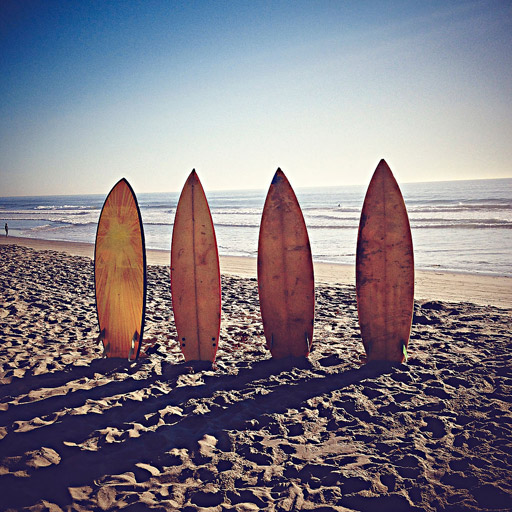

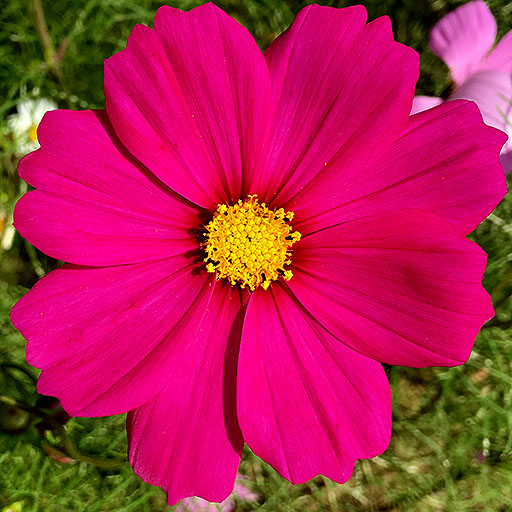

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img1)
cv2_imshow(img2)

## Arithmetic Operations on Images

### Accessing and Modifying pixel values


Accessing only one pixel of the image

In [ ]:
# how to access 1 pixel
px = img1[100,100] 
print(px)

[195 173 145]


Accessing only the blue channel of this pixel. Remember, OpenCV works in the BGR color space.

In [ ]:
# accessing only blue pixel 
blue = img1[100,100,0]
print(blue)

195


Modifying the value of a pixel

In [ ]:
# You can modify the pixel values the same way.
img1[100,100] = [255,255,255]
print(img1[100,100])

[255 255 255]


Displaying the result with the altered pixel

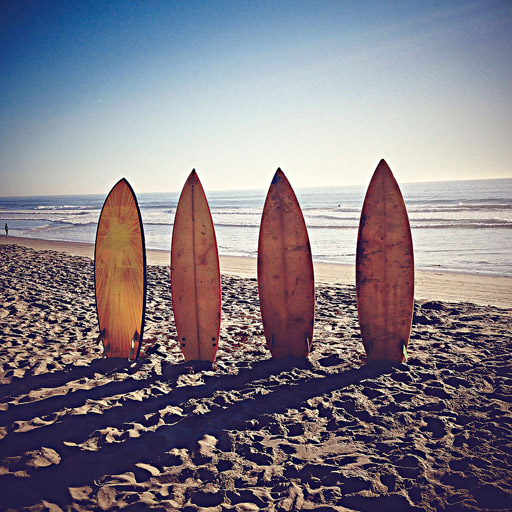

In [ ]:
cv2_imshow(img1)

### Splitting and Merging Image Channels


Splitting using `cv2.split()` and then merging with a shuffled color space using `cv2.merge()`

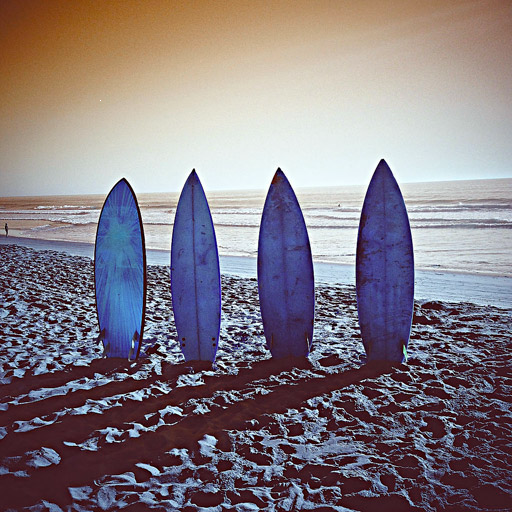

In [ ]:
b,g,r = cv2.split(img1)

img = cv2.merge((r,g,b))

cv2_imshow(img)

### Image Addition

You can add two images by OpenCV function, `cv2.add()` or simply by numpy operation, res = img1 + img2. Both images should be of same depth and type, or second image can just be a scalar value.

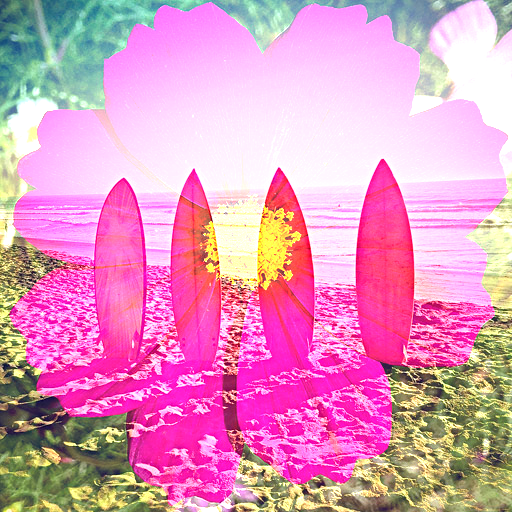

In [ ]:
# add images
res = cv2.add(img1, img2)

# show result
cv2_imshow(res)

Subtracting images

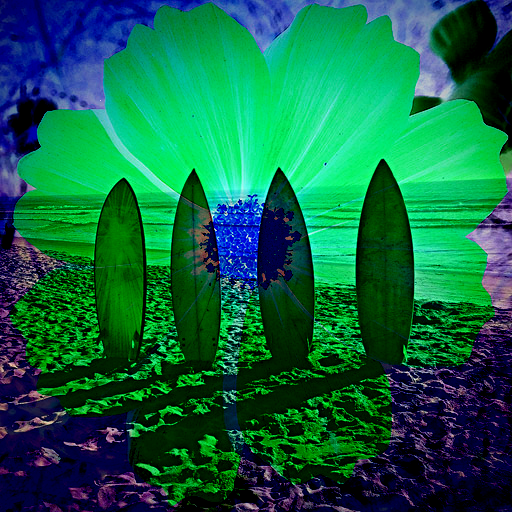

In [ ]:
# subtract images
res = cv2.subtract(img1, img2)

# show result
cv2_imshow(res)

Numerical addition of pixels: an image is a NumPy array so we can add them together but we get a different image from before. If you are adding two pixels: 120 and 200 = 320 > 255, then OpenCV limits this pixel to 255, but NumPy takes the modulo, remainder of the division so 320/255 has a remainder of 65 for example.

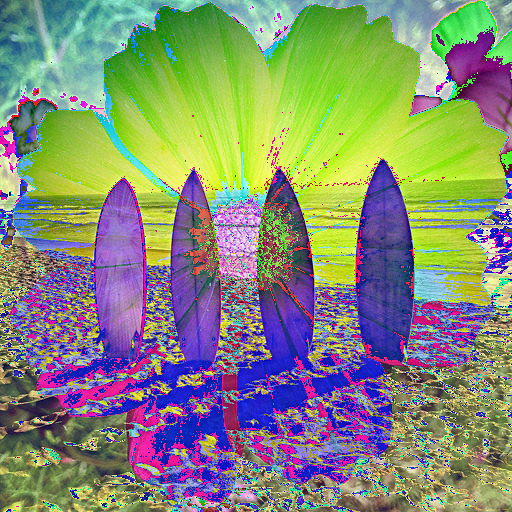

In [ ]:
res = img1 + img2
cv2_imshow(res)

### Image Blending

This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency. 

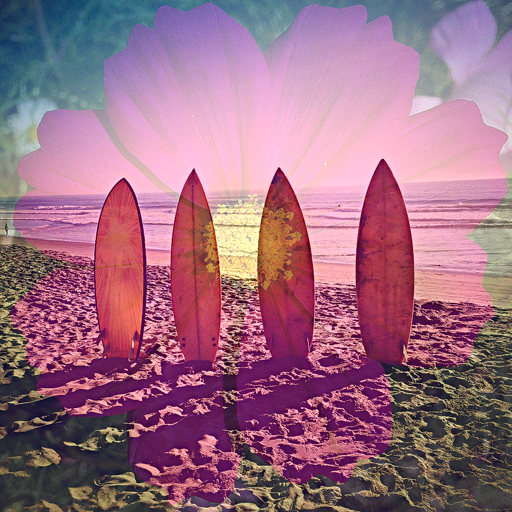

In [ ]:
blending = cv2.addWeighted(img1, 0.80, img2, 0.30, 0)
cv2_imshow(blending)

##Transformations

###Scaling
Scaling an image is resizing it into a new shape and a different number of pixels.

(256, 1024, 3)


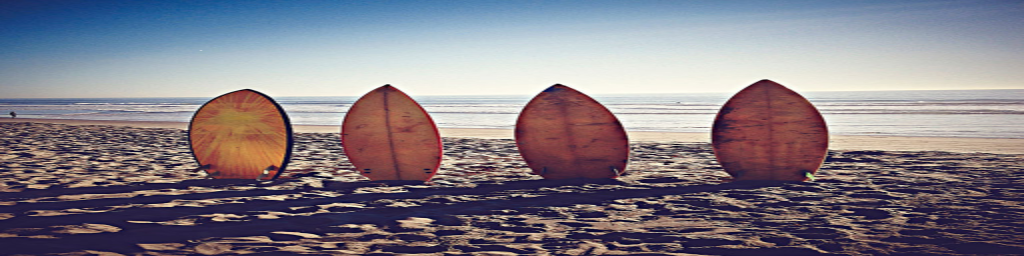

In [ ]:
height = img1.shape[0]
width = img1.shape[1]

dst = cv2.resize(img1, (int(width*2), int(height/2)))
print(dst.shape)
cv2_imshow(dst)

### Rotation
Rotation can be done in OpenCV in two ways: the explicit way and the easier, limited way. In the first one, we have to specify a rotation matrix centered at the center of the image, with optionally scaling the image when needed. We then need to apply `warpAffine` to get the rotated image.

The simpler way is faster and can be done with one code line but is limited to only three options of angles.

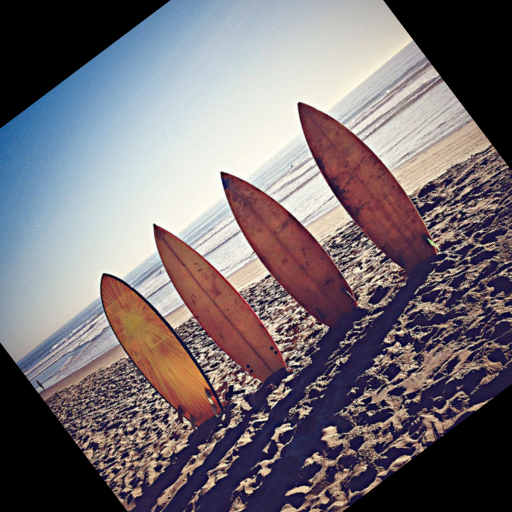

In [ ]:
center = (width / 2, height / 2)

angle90 = 90
angle180 = 180
angle270 = 270
angle = 37
 
scale = 1.0
 
# Perform the counter clockwise rotation holding at the center
# 30 degrees
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(img1, M, (height, width))

cv2_imshow(rotated)

The simpler, limited way:

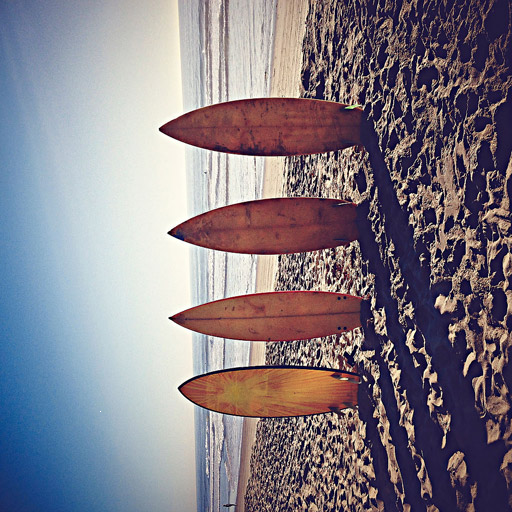

In [ ]:
# an easier way :)

rot90 = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(rot90)

### Translation
Let's use the `warpAffine` function and create multiple translation matrices with different directions to demonstrate OpenCV's translation abilities.

Translation Matrix Shape:
```
[ 1  0  tx ]

[ 0  1  ty ]
```



Using the first matrix:

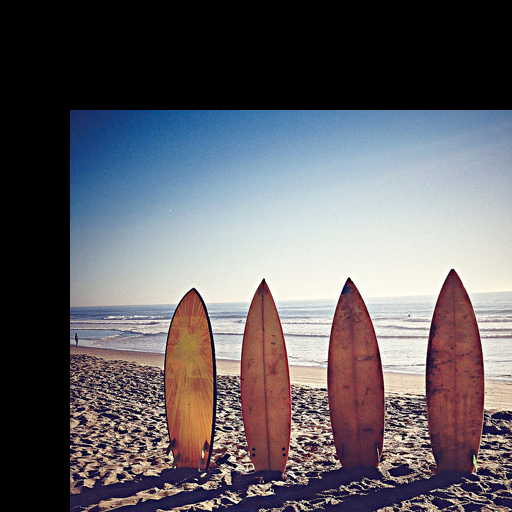

In [ ]:
import numpy as np

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img1, translation_matrix, (width, height))

cv2_imshow(img_translation)

The second matrix:

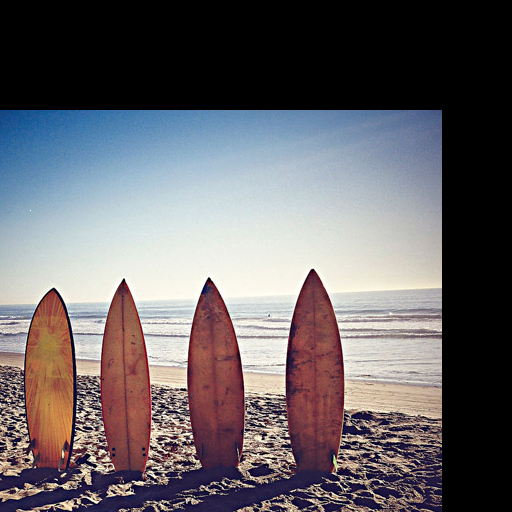

In [ ]:
import numpy as np

translation_matrix = np.float32([ [1,0,-70], [0,1,110] ])
img_translation = cv2.warpAffine(img1, translation_matrix, (width, height))

cv2_imshow(img_translation)

The third matrix:

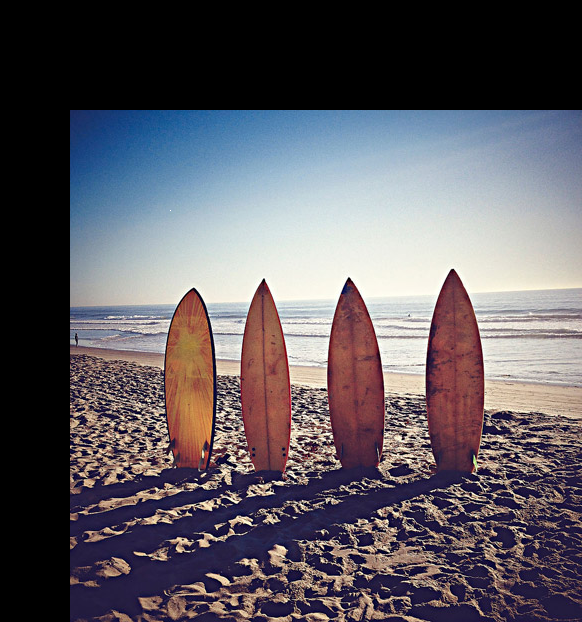

In [ ]:
import numpy as np

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img1, translation_matrix, (width+70, height+110))

cv2_imshow(img_translation)